In [1]:
import tensorflow as tf
from tensorflow import keras


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url = 'https://raw.githubusercontent.com/sirapat-thianphan/SeminarII_Sirapat/master/events_bs2_2.csv'
loaded_data = pd.read_csv(url, sep=',', header=0)

In [4]:
loaded_data.head(10)

,tactic0_id,longitude,latitude,NEAR_CCTV_,NEAR_MOOBA,MOOBAN_EST,MOOBAN_LEV,NEAR_UNITS,UNIT_TYPE,NEAR_VEHIC,VEHICLES_T,NEAR_NAIS_,NAIS_TYPE,NEAR_DIST
0,1,101.19182,6.13009,3467.485002,85.604275,0,0,927.963005,5,1308.145156,2,284.929088,3,27.677967
1,0,101.26577,6.41964,972.895329,1515.131446,0,0,1855.001821,4,2805.680397,2,1321.192664,1,1077.837387
2,1,101.14605,6.68195,4535.321847,372.279866,1,3,294.153727,7,212.795421,2,323.187802,10,97.315259
3,1,101.22266,6.85446,240.146910,333.135614,0,0,1591.508482,3,407.629181,1,155.356802,3,6.634046
4,0,101.34695,6.45786,242.448908,1172.773291,0,0,558.423389,5,701.641769,2,620.660475,5,31.915022
5,0,100.97757,6.65426,4096.016638,1315.821482,0,0,1716.603590,5,6956.354136,1,14218.082300,5,1124.033888
6,0,101.74995,6.27591,2686.242719,932.762119,1,3,1707.460629,4,3448.168296,2,69.781556,6,71.977883
7,0,101.62470,6.71488,580.185597,403.194092,0,0,567.060214,4,1545.663021,2,80.889155,4,35.425075
8,1,101.28660,6.72085,302.995168,143.336508,1,3,1104.123671,4,363.863675,2,1144.968962,3,25.827262
9,0,101.45094,6.49835,2562.292453,250.031476,0,0,3504.811321,4,7015.471466,2,2175.258547,6,14.428984


In [5]:
X = loaded_data.iloc[:,1:]
y = loaded_data.iloc[:,0]

In [6]:
X.head(5)

,longitude,latitude,NEAR_CCTV_,NEAR_MOOBA,MOOBAN_EST,MOOBAN_LEV,NEAR_UNITS,UNIT_TYPE,NEAR_VEHIC,VEHICLES_T,NEAR_NAIS_,NAIS_TYPE,NEAR_DIST
0,101.19182,6.13009,3467.485002,85.604275,0,0,927.963005,5,1308.145156,2,284.929088,3,27.677967
1,101.26577,6.41964,972.895329,1515.131446,0,0,1855.001821,4,2805.680397,2,1321.192664,1,1077.837387
2,101.14605,6.68195,4535.321847,372.279866,1,3,294.153727,7,212.795421,2,323.187802,10,97.315259
3,101.22266,6.85446,240.146910,333.135614,0,0,1591.508482,3,407.629181,1,155.356802,3,6.634046
4,101.34695,6.45786,242.448908,1172.773291,0,0,558.423389,5,701.641769,2,620.660475,5,31.915022


In [7]:
y.head(5)

0    1
1    0
2    1
3    1
4    0
Name: tactic0_id, dtype: int64

In [8]:
#standardizing the input feature
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

/Users/kratung/anaconda3/envs/tfdeeplearning/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [9]:
df = pd.DataFrame(data=X)   
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.491497,0.254955,0.107703,0.005184,0.0,0.0,0.028806,0.363636,0.037864,1.0,0.006080,0.222222,0.001228
1,0.533348,0.455602,0.030219,0.091754,0.0,0.0,0.057583,0.272727,0.081210,1.0,0.028261,0.000000,0.047830
2,0.465594,0.637373,0.140871,0.022545,1.0,1.0,0.009131,0.545455,0.006159,1.0,0.006899,1.000000,0.004318
3,0.508950,0.756916,0.007459,0.020174,0.0,0.0,0.049404,0.181818,0.011799,0.0,0.003306,0.222222,0.000294
4,0.579290,0.482087,0.007531,0.071022,0.0,0.0,0.017335,0.363636,0.020309,1.0,0.013266,0.444444,0.001416


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
X_train[0]

array([0.53209696, 0.65924273, 0.04094651, 0.03147587, 0.        ,
       0.        , 0.02843373, 0.27272727, 0.0793557 , 1.        ,
       0.01221485, 0.        , 0.00506735])

In [13]:
from keras import Sequential
from keras import models
from keras import layers
from keras import regularizers

Using TensorFlow backend.


In [14]:
## NN Model 1 ( 8, 16 , 16, 1 )
# output = activation(dot(input, kernel) + bias)
classifier1 = Sequential()
#First Hidden Layer
classifier1.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_dim=13))  
#classifier1.add(layers.Dropout(0.3))
#Second  Hidden Layer
classifier1.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
#classifier1.add(layers.Dropout(0.3))
#Third Hidden Layer
classifier1.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
#classifier1.add(layers.Dropout(0.3))
#Output Layer
classifier1.add(layers.Dense(1, activation='sigmoid'))
#Compiling the neural network
classifier1.compile(optimizer ='rmsprop',loss='binary_crossentropy', metrics =['accuracy'])

In [15]:
## NN Model 2 ( 16, 32 , 32, 1 )
# output = activation(dot(input, kernel) + bias)
classifier2 = Sequential()
#First Hidden Layer
classifier2.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_dim=13))  
#classifier2.add(layers.Dropout(0.3))
#Second  Hidden Layer
classifier2.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
#classifier2.add(layers.Dropout(0.3))
#Third Hidden Layer
classifier2.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
#classifier2.add(layers.Dropout(0.3))
#Output Layer
classifier2.add(layers.Dense(1, activation='sigmoid'))
#Compiling the neural network
classifier2.compile(optimizer ='rmsprop',loss='binary_crossentropy', metrics =['accuracy'])

In [17]:
## NN Model 3 ( 32, 64 , 64, 1 )
# output = activation(dot(input, kernel) + bias)
classifier3 = Sequential()
#First Hidden Layer
classifier3.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_dim=13))  
#classifier3.add(layers.Dropout(0.3))
#Second  Hidden Layer
classifier3.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
#classifier3.add(layers.Dropout(0.3))
#Third Hidden Layer
classifier3.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
#classifier3.add(layers.Dropout(0.3))
#Output Layer
classifier3.add(layers.Dense(1, activation='sigmoid'))
#Compiling the neural network
classifier3.compile(optimizer ='rmsprop',loss='binary_crossentropy', metrics =['accuracy'])

In [18]:
# Validation Approach
x_val = X_train[:1000]
partial_x_train = X_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]



In [19]:
classifier1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history1 = classifier1.fit(partial_x_train, partial_y_train, epochs=100, batch_size=128, validation_data=(x_val, y_val))

Train on 5400 samples, validate on 1000 samples
Epoch 1/100
5400/5400 [==============================] - 2s 357us/step - loss: 0.7232 - acc: 0.5446 - val_loss: 0.7190 - val_acc: 0.5570
Epoch 2/100
5400/5400 [==============================] - 0s 69us/step - loss: 0.7148 - acc: 0.5631 - val_loss: 0.7115 - val_acc: 0.5660
Epoch 3/100
5400/5400 [==============================] - 0s 57us/step - loss: 0.7082 - acc: 0.5746 - val_loss: 0.7049 - val_acc: 0.5930
Epoch 4/100
5400/5400 [==============================] - 0s 54us/step - loss: 0.7023 - acc: 0.5770 - val_loss: 0.6987 - val_acc: 0.6000
Epoch 5/100
5400/5400 [==============================] - 0s 53us/step - loss: 0.6963 - acc: 0.5802 - val_loss: 0.6933 - val_acc: 0.5980
Epoch 6/100
5400/5400 [==============================] - 0s 46us/step - loss: 0.6918 - acc: 0.5859 - val_loss: 0.6901 - val_acc: 0.5920
Epoch 7/100
5400/5400 [==============================] - 0s 60us/step - loss: 0.6880 - acc: 0.5902 - val_loss: 0.6866 - val_acc: 0.5960

5400/5400 [==============================] - 0s 51us/step - loss: 0.6519 - acc: 0.6381 - val_loss: 0.6642 - val_acc: 0.6160
Epoch 61/100
5400/5400 [==============================] - 0s 38us/step - loss: 0.6524 - acc: 0.6359 - val_loss: 0.6629 - val_acc: 0.6150
Epoch 62/100
5400/5400 [==============================] - 0s 37us/step - loss: 0.6521 - acc: 0.6372 - val_loss: 0.6664 - val_acc: 0.6090
Epoch 63/100
5400/5400 [==============================] - 0s 42us/step - loss: 0.6532 - acc: 0.6354 - val_loss: 0.6636 - val_acc: 0.6170
Epoch 64/100
5400/5400 [==============================] - 0s 46us/step - loss: 0.6520 - acc: 0.6343 - val_loss: 0.6627 - val_acc: 0.6180
Epoch 65/100
5400/5400 [==============================] - 0s 47us/step - loss: 0.6519 - acc: 0.6352 - val_loss: 0.6616 - val_acc: 0.6210
Epoch 66/100
5400/5400 [==============================] - 0s 41us/step - loss: 0.6512 - acc: 0.6356 - val_loss: 0.6750 - val_acc: 0.5770
Epoch 67/100
5400/5400 [==============================

In [20]:
classifier2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history2 = classifier2.fit(partial_x_train, partial_y_train, epochs=100, batch_size=128, validation_data=(x_val, y_val))

Train on 5400 samples, validate on 1000 samples
Epoch 1/100
5400/5400 [==============================] - 3s 554us/step - loss: 0.7456 - acc: 0.5452 - val_loss: 0.7349 - val_acc: 0.5440
Epoch 2/100
5400/5400 [==============================] - 0s 68us/step - loss: 0.7292 - acc: 0.5607 - val_loss: 0.7228 - val_acc: 0.5890
Epoch 3/100
5400/5400 [==============================] - 0s 81us/step - loss: 0.7170 - acc: 0.5680 - val_loss: 0.7116 - val_acc: 0.5880
Epoch 4/100
5400/5400 [==============================] - 1s 120us/step - loss: 0.7080 - acc: 0.5728 - val_loss: 0.7028 - val_acc: 0.5890
Epoch 5/100
5400/5400 [==============================] - 1s 147us/step - loss: 0.7007 - acc: 0.5850 - val_loss: 0.6955 - val_acc: 0.5990
Epoch 6/100
5400/5400 [==============================] - 1s 128us/step - loss: 0.6951 - acc: 0.5870 - val_loss: 0.6901 - val_acc: 0.6070
Epoch 7/100
5400/5400 [==============================] - 1s 129us/step - loss: 0.6901 - acc: 0.5959 - val_loss: 0.6921 - val_acc: 0.

5400/5400 [==============================] - 0s 75us/step - loss: 0.6556 - acc: 0.6361 - val_loss: 0.6631 - val_acc: 0.6170
Epoch 61/100
5400/5400 [==============================] - 0s 70us/step - loss: 0.6560 - acc: 0.6307 - val_loss: 0.6718 - val_acc: 0.6150
Epoch 62/100
5400/5400 [==============================] - 0s 76us/step - loss: 0.6540 - acc: 0.6307 - val_loss: 0.6666 - val_acc: 0.6190
Epoch 63/100
5400/5400 [==============================] - 0s 66us/step - loss: 0.6553 - acc: 0.6313 - val_loss: 0.6612 - val_acc: 0.6230
Epoch 64/100
5400/5400 [==============================] - 0s 90us/step - loss: 0.6547 - acc: 0.6335 - val_loss: 0.6711 - val_acc: 0.6080
Epoch 65/100
5400/5400 [==============================] - 1s 106us/step - loss: 0.6550 - acc: 0.6328 - val_loss: 0.6645 - val_acc: 0.6060
Epoch 66/100
5400/5400 [==============================] - 1s 95us/step - loss: 0.6550 - acc: 0.6322 - val_loss: 0.6653 - val_acc: 0.6180
Epoch 67/100
5400/5400 [=============================

In [21]:
classifier3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history3 = classifier3.fit(partial_x_train, partial_y_train, epochs=100, batch_size=128, validation_data=(x_val, y_val))

Train on 5400 samples, validate on 1000 samples
Epoch 1/100
5400/5400 [==============================] - 2s 344us/step - loss: 0.7830 - acc: 0.5626 - val_loss: 0.7583 - val_acc: 0.5880
Epoch 2/100
5400/5400 [==============================] - 1s 147us/step - loss: 0.7447 - acc: 0.5880 - val_loss: 0.7296 - val_acc: 0.5910
Epoch 3/100
5400/5400 [==============================] - 1s 119us/step - loss: 0.7203 - acc: 0.5948 - val_loss: 0.7218 - val_acc: 0.5670
Epoch 4/100
5400/5400 [==============================] - 1s 131us/step - loss: 0.7063 - acc: 0.6002 - val_loss: 0.7060 - val_acc: 0.6000
Epoch 5/100
5400/5400 [==============================] - 1s 131us/step - loss: 0.6962 - acc: 0.6085 - val_loss: 0.7045 - val_acc: 0.5740
Epoch 6/100
5400/5400 [==============================] - 1s 103us/step - loss: 0.6922 - acc: 0.6070 - val_loss: 0.6927 - val_acc: 0.6050
Epoch 7/100
5400/5400 [==============================] - 1s 103us/step - loss: 0.6875 - acc: 0.6115 - val_loss: 0.6957 - val_acc: 

5400/5400 [==============================] - 1s 190us/step - loss: 0.6477 - acc: 0.6424 - val_loss: 0.6540 - val_acc: 0.6340
Epoch 61/100
5400/5400 [==============================] - 1s 218us/step - loss: 0.6466 - acc: 0.6422 - val_loss: 0.6706 - val_acc: 0.5980
Epoch 62/100
5400/5400 [==============================] - 1s 191us/step - loss: 0.6472 - acc: 0.6426 - val_loss: 0.6548 - val_acc: 0.6360
Epoch 63/100
5400/5400 [==============================] - 1s 178us/step - loss: 0.6470 - acc: 0.6446 - val_loss: 0.6900 - val_acc: 0.5920
Epoch 64/100
5400/5400 [==============================] - 1s 169us/step - loss: 0.6473 - acc: 0.6413 - val_loss: 0.6571 - val_acc: 0.6220
Epoch 65/100
5400/5400 [==============================] - 1s 136us/step - loss: 0.6465 - acc: 0.6407 - val_loss: 0.6631 - val_acc: 0.6240
Epoch 66/100
5400/5400 [==============================] - 1s 153us/step - loss: 0.6462 - acc: 0.6417 - val_loss: 0.6524 - val_acc: 0.6250
Epoch 67/100
5400/5400 [=======================

In [22]:
history_dict1 = history1.history
history_dict2 = history2.history
history_dict3 = history3.history

history_dict1.keys()

dict_keys(['loss', 'val_loss', 'acc', 'val_acc'])

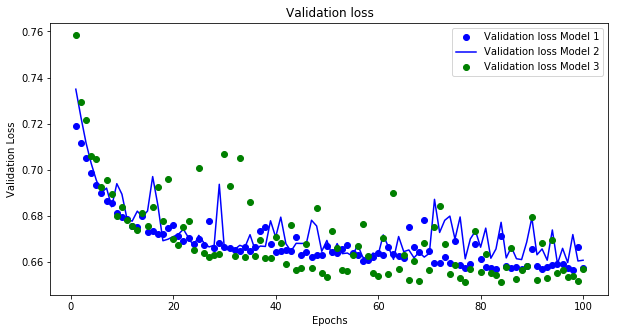

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

history_dict1 = history1.history
val_loss_values_1 = history_dict1['val_loss']
val_loss_values_2 = history_dict2['val_loss']
val_loss_values_3 = history_dict3['val_loss']

epochs = range(1, len(history_dict1['acc']) + 1 )

plt.plot(epochs, val_loss_values_1, 'bo', label='Validation loss Model 1')
plt.plot(epochs, val_loss_values_2, 'b', label='Validation loss Model 2')
plt.plot(epochs, val_loss_values_3, 'go', label='Validation loss Model 3')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show()

In [24]:
# NN Model 2 Training again with epochs = 15
# output = activation(dot(input, kernel) + bias)
classifier = Sequential()
#First Hidden Layer
classifier.add(layers.Dense(16, activation='relu', kernel_initializer='random_normal', input_dim=13))  
#Second  Hidden Layer
classifier.add(layers.Dense(32, activation='relu', kernel_initializer='random_normal'))
#Third Hidden Layer
classifier.add(layers.Dense(32, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(layers.Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
#Compiling the neural network
classifier.compile(optimizer ='rmsprop',loss='binary_crossentropy', metrics =['accuracy'])

classifier.fit(X_train, y_train, epochs=30, batch_size=128)
results = classifier.evaluate(X_test, y_test)

Epoch 1/30
6400/6400 [==============================] - 1s 189us/step - loss: 0.6930 - acc: 0.5084
Epoch 2/30
6400/6400 [==============================] - 0s 74us/step - loss: 0.6913 - acc: 0.5691
Epoch 3/30
6400/6400 [==============================] - 0s 56us/step - loss: 0.6854 - acc: 0.5742
Epoch 4/30
6400/6400 [==============================] - 1s 84us/step - loss: 0.6754 - acc: 0.5945
Epoch 5/30
6400/6400 [==============================] - 0s 76us/step - loss: 0.6656 - acc: 0.6017
Epoch 6/30
6400/6400 [==============================] - 1s 95us/step - loss: 0.6597 - acc: 0.6083
Epoch 7/30
6400/6400 [==============================] - 0s 72us/step - loss: 0.6563 - acc: 0.6095
Epoch 8/30
6400/6400 [==============================] - 0s 65us/step - loss: 0.6535 - acc: 0.6138
Epoch 9/30
6400/6400 [==============================] - 0s 59us/step - loss: 0.6513 - acc: 0.6133
Epoch 10/30
6400/6400 [==============================] - 1s 84us/step - loss: 0.6485 - acc: 0.6123
Epoch 11/30
6400/6

In [25]:
print(results)

[0.630736014842987, 0.6425]
